In [6]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [7]:
data=pd.read_csv('heart_disease_uci.csv')


# 1. EDA-exploratory data analysis

In [8]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
data.shape
data.isnull().sum()



id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [11]:
data['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

# VISUALISATION

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='Count'>

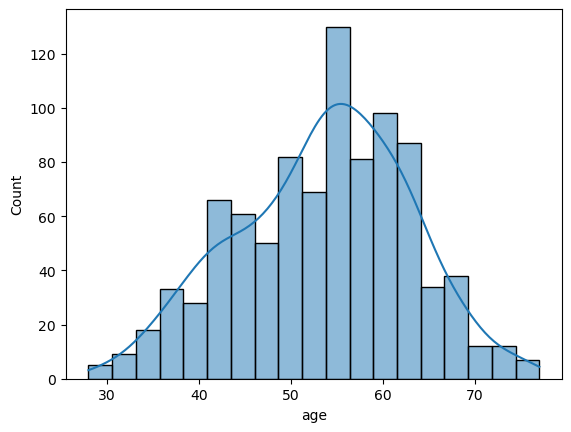

In [13]:
sns.histplot(data['age'],kde=True)

<Axes: xlabel='sex', ylabel='count'>

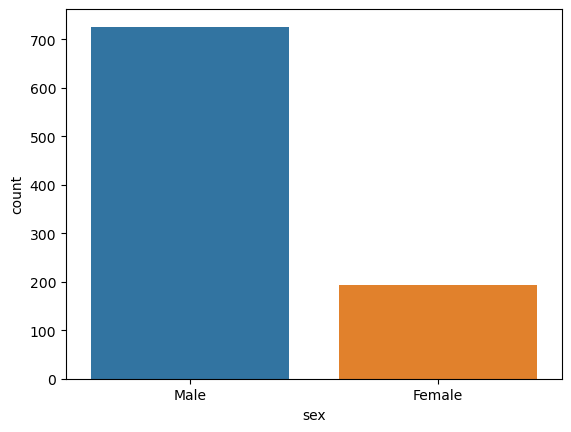

In [14]:
sns.countplot(x='sex',data=data)

<Axes: xlabel='num', ylabel='count'>

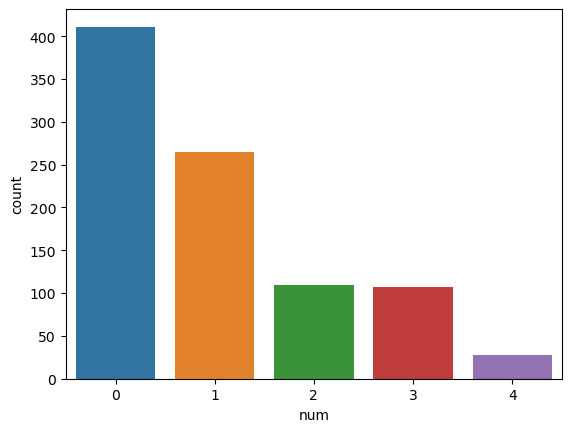

In [15]:
sns.countplot(x='num',data=data)

# 2.Data cleaning

In [16]:
data['target']=data['num'].apply(lambda x:1 if x>0 else 0) #changing the target value num into binary 0 for no heart disease and 1 for heart disease

In [17]:
data.drop(['id','dataset','num'], axis=1, inplace=True) #enlever les colonnes qui ne sont pas utils

In [18]:
data.replace("?", np.nan, inplace=True) #remplacer les valeur manquante ? par nan

In [19]:
data.dropna(inplace=True) #enlever les lignes avec des valeurs manquantes

In [20]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'sex', 'exang', 'fbs']
data_encoded=pd.get_dummies(data, columns=categorical_cols,drop_first=True)

In [21]:
data_encoded.head()

,age,trestbps,chol,thalch,oldpeak,ca,target,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,sex_Male,exang_True,fbs_True
0,63,145.0,233.0,150.0,2.3,0.0,0,False,False,True,False,False,False,False,False,False,True,False,True
1,67,160.0,286.0,108.0,1.5,3.0,1,False,False,False,False,False,True,False,True,False,True,True,False
2,67,120.0,229.0,129.0,2.6,2.0,1,False,False,False,False,False,True,False,False,True,True,True,False
3,37,130.0,250.0,187.0,3.5,0.0,0,False,True,False,True,False,False,False,True,False,True,False,False
4,41,130.0,204.0,172.0,1.4,0.0,0,True,False,False,False,False,False,True,True,False,False,False,False


# 3.splitting and training

# Descision Tree

In [22]:
from sklearn.model_selection import train_test_split
#features (X) and target (y)

X=data_encoded.drop('target', axis=1)
y=data_encoded['target']
#split ( 80%train , 20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.8
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.76      0.76      0.76        25

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



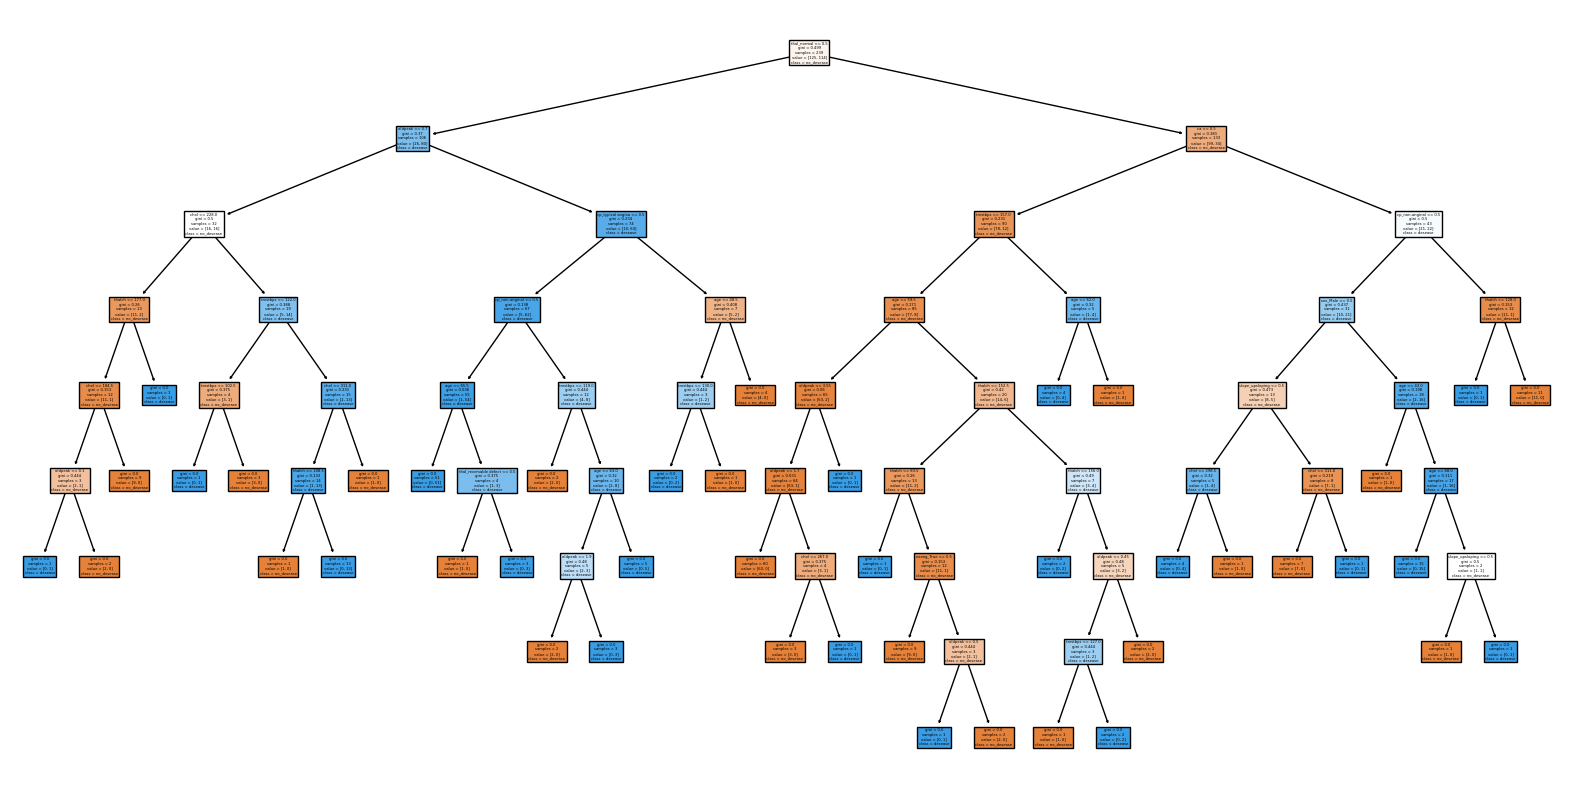

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=X.columns.to_list(), class_names=['no_desease','desease'])
plt.show()

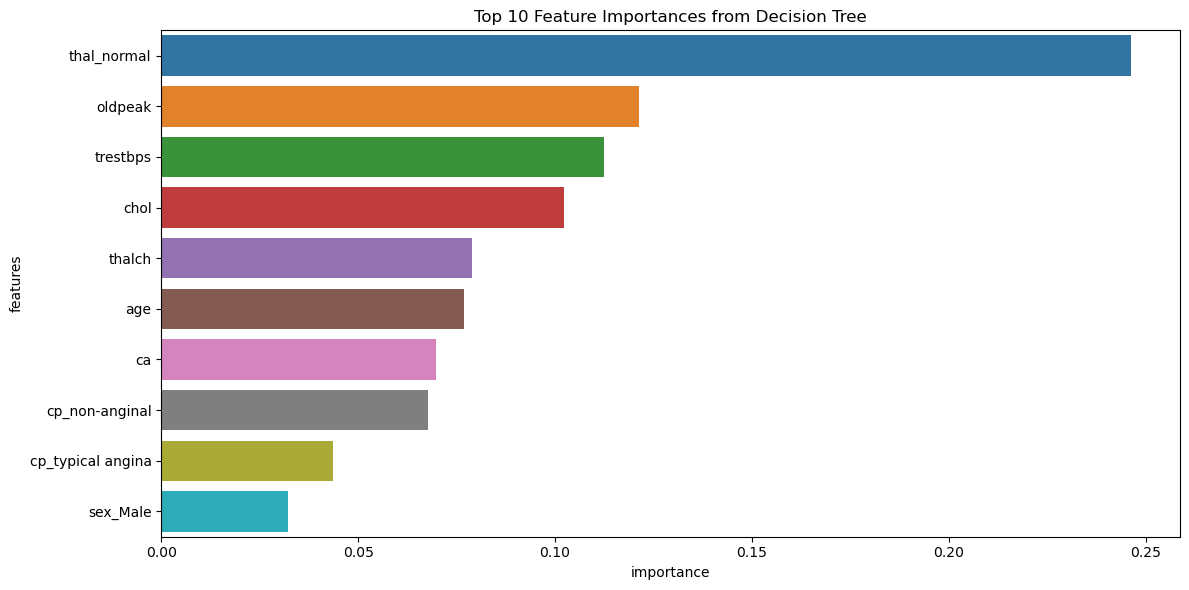

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#get feature importance
importances=clf.feature_importances_
feature_names=X.columns.to_list()
#create a dataframe
feat_importances=pd.DataFrame({'features':feature_names,'importance':importances})
feat_importances.sort_values(by='importance', ascending=False, inplace=True)
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='importance',y='features',data=feat_importances.head(10))
plt.title("Top 10 Feature Importances from Decision Tree")
plt.tight_layout()
plt.show()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#train 
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
#predict
y_pred_rf=rf.predict(X_test)
#evaluate
print("Random Forest accuracy",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest accuracy 0.9
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.88      0.88      0.88        25

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



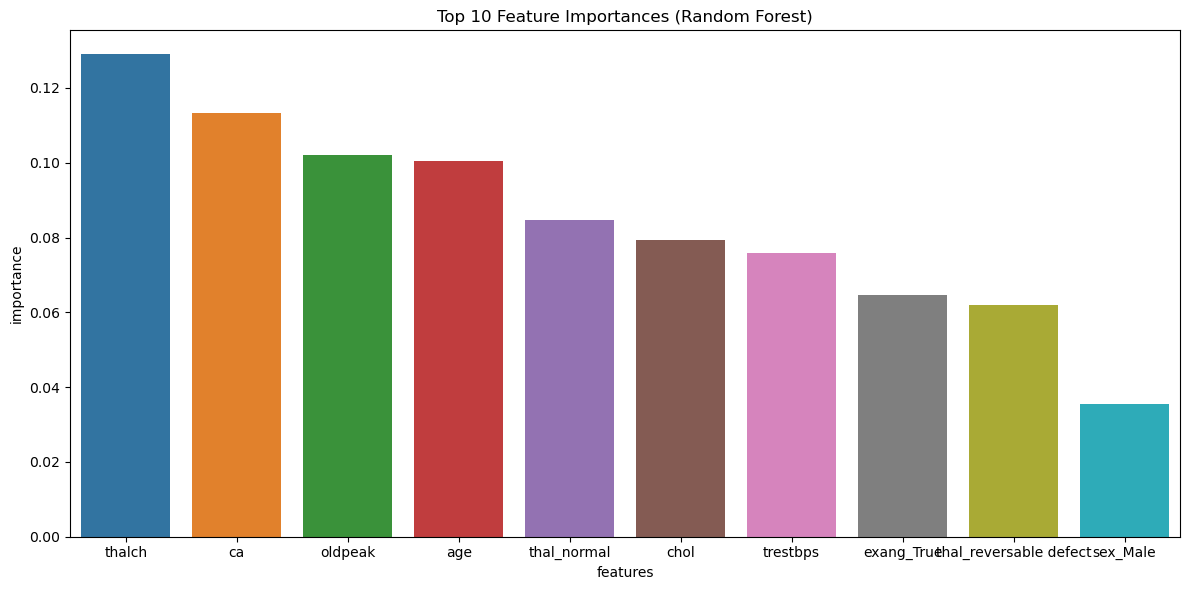

In [27]:
#feature importance
importances_rf=rf.feature_importances_
feat_importances_rf=pd.DataFrame({'features':feature_names,'importance':importances_rf})
feat_importances_rf.sort_values(by='importance',ascending=False,inplace=True)
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x ='features',y='importance',data=feat_importances_rf.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


# The relation between thalach and heart disease

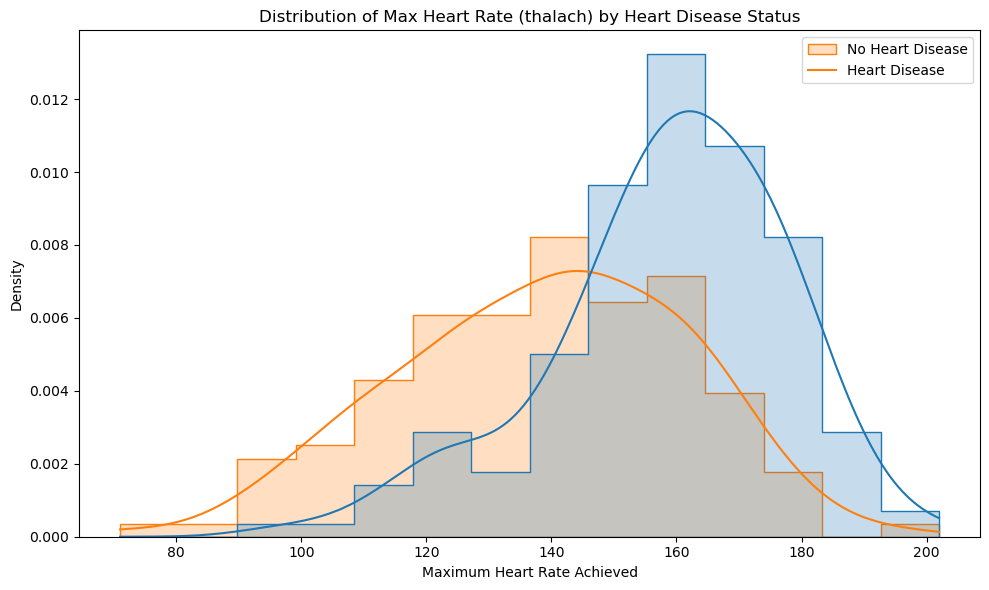

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x='thalch',hue='target',kde=True, element='step',stat='density')
plt.title('Distribution of Max Heart Rate (thalach) by Heart Disease Status')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Density')
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

In [29]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,X_train,y_train,cv=5,scoring='accuracy')
print(f"cross validated accuracy scores:{scores}")
print(f"mean accuracy:{scores.mean():.3f}")

cross validated accuracy scores:[0.8125     0.875      0.75       0.77083333 0.82978723]
mean accuracy:0.808


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_rf=rf.predict(X_test)
print(confusion_matrix(y_pred_rf,y_test))
print(classification_report(y_pred_rf,y_test))

[[32  3]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.88      0.88      0.88        25

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



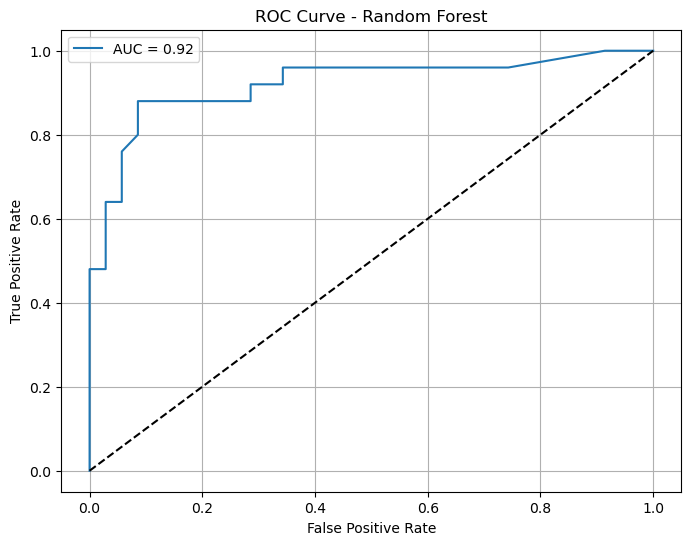

In [31]:
from sklearn.metrics import roc_curve , roc_auc_score
y_proba_rf=rf.predict_proba(X_test)[:,1] 
fpr,tpr,thresholds=roc_curve(y_test,y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba_rf):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()

# XGBOOST


In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from xgboost import XGBClassifier 

#create model instance 
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#fit the model
xgb_model.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
# Predicted class labels (0 or 1)
y_pred = xgb_model.predict(X_test)

# Predicted probabilities for class 1 (positive class)
y_proba = xgb_model.predict_proba(X_test)[:, 1]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy" ,accuracy_score(y_test,y_pred))
print("preciosn_score" , precision_score(y_test,y_pred))
print("recall_score", recall_score(y_test,y_pred))
print("f1_score", f1_score(y_test,y_pred))


Accuracy 0.8666666666666667
preciosn_score 0.84
recall_score 0.84
f1_score 0.8399999999999999


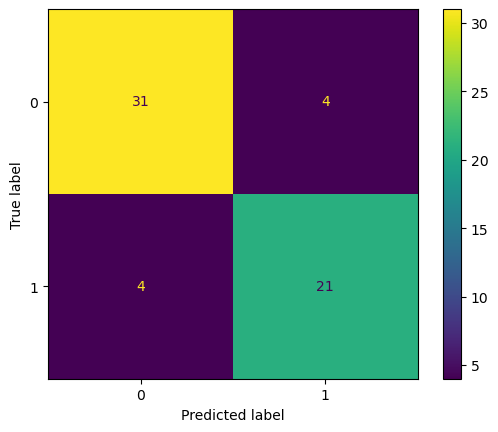

In [36]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay 
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

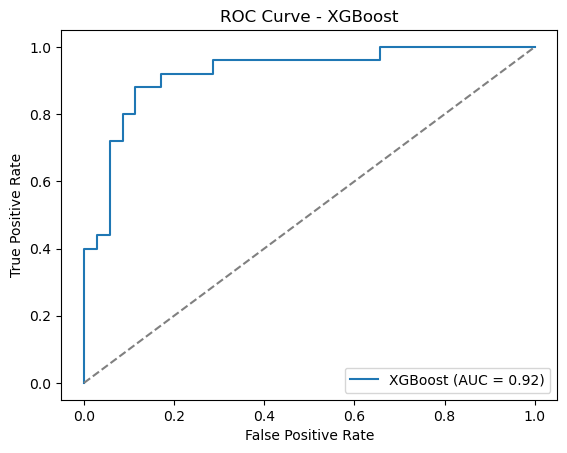

In [37]:
from sklearn.metrics import roc_curve , roc_auc_score 
fpr,tpr,_=roc_curve(y_test,y_proba)
auc=roc_auc_score(y_test,y_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

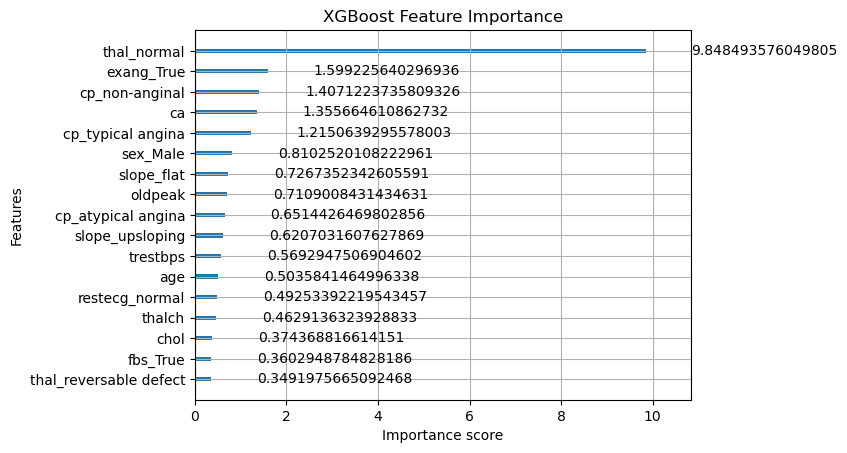

In [38]:
from xgboost import plot_importance 
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain')
plt.title("XGBoost Feature Importance")
plt.show()

# Hyperparameter tunning

In [39]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[3,5],
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.1]
    
}
grid=GridSearchCV(XGBClassifier(use_label_encoder=False,eval_metrics='logloss'),param_grid=params,scoring='roc_auc',cv=5)
grid.fit(X_train,y_train)
print("Best Parameters:", grid.best_params_)

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_met

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_met

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.80, 0.90, 0.87],
    'Precision': [0.76, 0.88, 0.84],
    'Recall': [0.76, 0.88, 0.84],
    'F1 Score': [0.76, 0.88, 0.84],
    'AUC': [0.84, 0.91, 0.93]  # Update with your actual AUC scores
})
results.sort_values(by='AUC', ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,AUC
2,XGBoost,0.87,0.84,0.84,0.84,0.93
1,Random Forest,0.90,0.88,0.88,0.88,0.91
0,Decision Tree,0.80,0.76,0.76,0.76,0.84


In [51]:
import os
os.makedirs("models", exist_ok=True)


In [52]:
import joblib
joblib.dump(X.columns.tolist(), 'models/feature_columns.pkl')


['models/feature_columns.pkl']

In [41]:
import joblib
joblib.dump(xgb_model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

# Streamlit app

In [42]:
pip install streamlit

In [43]:
import joblib

joblib.dump(xgb_model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [53]:
# Load the expected feature columns
feature_columns = joblib.load('models/feature_columns.pkl')


In [54]:
# Align input_df with training feature columns
for col in feature_columns:
    if col not in input_df:
        input_df[col] = 0  # add missing columns as 0

input_df = input_df[feature_columns]  # re-order columns to match


In [56]:
import os
os.getcwd()


'C:\\Users\\user'

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model and expected feature columns
model = joblib.load('models/heart_disease_model.pkl')
feature_columns = joblib.load('models/feature_columns.pkl')

st.title(" Heart Disease Prediction App")
st.markdown("This app predicts the likelihood of heart disease based on clinical features.")

# Sidebar - User Inputs
st.sidebar.header("Patient Information")

def user_input_features():
    age = st.sidebar.slider("Age", 20, 80, 50)
    sex = st.sidebar.selectbox("Sex", ["Male", "Female"])
    trestbps = st.sidebar.slider("Resting Blood Pressure", 80, 200, 120)
    chol = st.sidebar.slider("Serum Cholesterol (mg/dl)", 100, 400, 200)
    thalch = st.sidebar.slider("Max Heart Rate Achieved", 70, 210, 150)
    oldpeak = st.sidebar.slider("Oldpeak", 0.0, 6.5, 1.0)
    ca = st.sidebar.selectbox("Number of Major Vessels (0-3)", [0, 1, 2, 3])

    cp = st.sidebar.selectbox("Chest Pain Type", ["typical angina", "atypical angina", "non-anginal", "asymptomatic"])
    restecg = st.sidebar.selectbox("Resting ECG", ["lv hypertrophy", "normal", "st-t abnormality"])
    slope = st.sidebar.selectbox("Slope", ["flat", "upsloping", "downsloping"])
    thal = st.sidebar.selectbox("Thalassemia", ["normal", "fixed defect", "reversable defect"])
    exang = st.sidebar.checkbox("Exercise Induced Angina")
    fbs = st.sidebar.checkbox("Fasting Blood Sugar > 120 mg/dl")

    # Create input dictionary
    data = {
        'age': age,
        'trestbps': trestbps,
        'chol': chol,
        'thalch': thalch,
        'oldpeak': oldpeak,
        'ca': ca,
        'sex_Male': 1 if sex == "Male" else 0,
        'exang_True': int(exang),
        'fbs_True': int(fbs),
        'cp_atypical angina': int(cp == "atypical angina"),
        'cp_non-anginal': int(cp == "non-anginal"),
        'cp_typical angina': int(cp == "typical angina"),
        'restecg_normal': int(restecg == "normal"),
        'restecg_st-t abnormality': int(restecg == "st-t abnormality"),
        'slope_flat': int(slope == "flat"),
        'slope_upsloping': int(slope == "upsloping"),
        'thal_normal': int(thal == "normal"),
        'thal_reversable defect': int(thal == "reversable defect"),
    }

    input_df = pd.DataFrame([data])
    return input_df

# Get user input
input_df = user_input_features()

# Make sure all expected columns are present, fill missing with 0
for col in feature_columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Reorder to match training
input_df = input_df[feature_columns]

# Predict
prediction = model.predict(input_df)[0]
prediction_proba = model.predict_proba(input_df)[0][1]

# Show result
st.subheader("Prediction Result")
if prediction == 1:
    st.error(f"⚠️ The model predicts a high risk of heart disease. Probability: {prediction_proba:.2f}")
else:
    st.success(f"✅ The model predicts low risk of heart disease. Probability: {prediction_proba:.2f}")

st.markdown("### Input Summary")
st.write(input_df)


In [ ]:
import os
print("Current working directory:")
print(os.getcwd())


In [2]:
import os
os.makedirs("app", exist_ok=True)
print("✅ Folder 'app/' created.")


✅ Folder 'app/' created.


In [3]:
streamlit_code = """
import streamlit as st
import pandas as pd
import numpy as np
import joblib

model = joblib.load('heart_disease_model.pkl')
feature_columns = joblib.load('models/feature_columns.pkl')

st.title(" Heart Disease Prediction App")
st.markdown("This app predicts the likelihood of heart disease based on clinical features.")

st.sidebar.header("Patient Information")

def user_input_features():
    age = st.sidebar.slider("Age", 20, 80, 50)
    sex = st.sidebar.selectbox("Sex", ["Male", "Female"])
    trestbps = st.sidebar.slider("Resting Blood Pressure", 80, 200, 120)
    chol = st.sidebar.slider("Serum Cholesterol (mg/dl)", 100, 400, 200)
    thalch = st.sidebar.slider("Max Heart Rate Achieved", 70, 210, 150)
    oldpeak = st.sidebar.slider("Oldpeak", 0.0, 6.5, 1.0)
    ca = st.sidebar.selectbox("Number of Major Vessels (0-3)", [0, 1, 2, 3])
    cp = st.sidebar.selectbox("Chest Pain Type", ["typical angina", "atypical angina", "non-anginal", "asymptomatic"])
    restecg = st.sidebar.selectbox("Resting ECG", ["lv hypertrophy", "normal", "st-t abnormality"])
    slope = st.sidebar.selectbox("Slope", ["flat", "upsloping", "downsloping"])
    thal = st.sidebar.selectbox("Thalassemia", ["normal", "fixed defect", "reversable defect"])
    exang = st.sidebar.checkbox("Exercise Induced Angina")
    fbs = st.sidebar.checkbox("Fasting Blood Sugar > 120 mg/dl")

    data = {
        'age': age,
        'trestbps': trestbps,
        'chol': chol,
        'thalch': thalch,
        'oldpeak': oldpeak,
        'ca': ca,
        'sex_Male': 1 if sex == "Male" else 0,
        'exang_True': int(exang),
        'fbs_True': int(fbs),
        'cp_atypical angina': int(cp == "atypical angina"),
        'cp_non-anginal': int(cp == "non-anginal"),
        'cp_typical angina': int(cp == "typical angina"),
        'restecg_normal': int(restecg == "normal"),
        'restecg_st-t abnormality': int(restecg == "st-t abnormality"),
        'slope_flat': int(slope == "flat"),
        'slope_upsloping': int(slope == "upsloping"),
        'thal_normal': int(thal == "normal"),
        'thal_reversable defect': int(thal == "reversable defect"),
    }

    return pd.DataFrame([data])

input_df = user_input_features()

for col in feature_columns:
    if col not in input_df.columns:
        input_df[col] = 0
input_df = input_df[feature_columns]

prediction = model.predict(input_df)[0]
prediction_proba = model.predict_proba(input_df)[0][1]

st.subheader("Prediction Result")
if prediction == 1:
    st.error(f" High risk of heart disease. Probability: {prediction_proba:.2f}")
else:
    st.success(f" Low risk of heart disease. Probability: {prediction_proba:.2f}")

st.markdown("### Input Summary")
st.write(input_df)
"""

with open("app/streamlit_app.py", "w") as f:
    f.write(streamlit_code)

print("✅ Streamlit app code saved.")


✅ Streamlit app code saved.


In [ ]:
!streamlit run app/streamlit_app.py


In [1]:
import os
print(os.getcwd())


C:\Users\user
